In [1]:
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
# Load preprocessed data
preprocessor = joblib.load('../data/processed/preprocessor.pkl')
X_train_processed, X_test_processed, y_train, y_test = joblib.load('../data/processed/train_test_data.pkl')

print(X_train_processed.shape)
print(X_test_processed.shape)


(204277, 19)
(51070, 19)


In [4]:
# Initialize with class_weight balanced (if imbalance found)
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train
log_reg.fit(X_train_processed, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test_processed)


In [5]:
tree = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)

tree.fit(X_train_processed, y_train)
y_pred_tree = tree.predict(X_test_processed)


In [6]:
# Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Decision Tree
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.92      0.59      0.72     45139
           1       0.17      0.63      0.27      5931

    accuracy                           0.60     51070
   macro avg       0.55      0.61      0.49     51070
weighted avg       0.84      0.60      0.67     51070

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69     45139
           1       0.16      0.65      0.25      5931

    accuracy                           0.56     51070
   macro avg       0.54      0.60      0.47     51070
weighted avg       0.83      0.56      0.64     51070



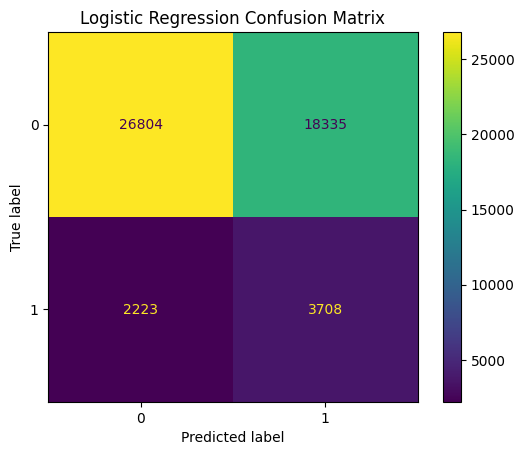

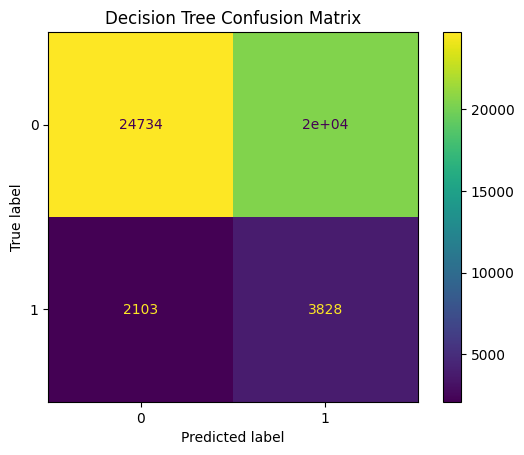

In [7]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_processed, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(tree, X_test_processed, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [8]:
# Logistic Regression
y_pred_proba_lr = log_reg.predict_proba(X_test_processed)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"Logistic Regression ROC-AUC: {roc_auc_lr:.2f}")

# Decision Tree
y_pred_proba_tree = tree.predict_proba(X_test_processed)[:, 1]
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
print(f"Decision Tree ROC-AUC: {roc_auc_tree:.2f}")


Logistic Regression ROC-AUC: 0.65
Decision Tree ROC-AUC: 0.63


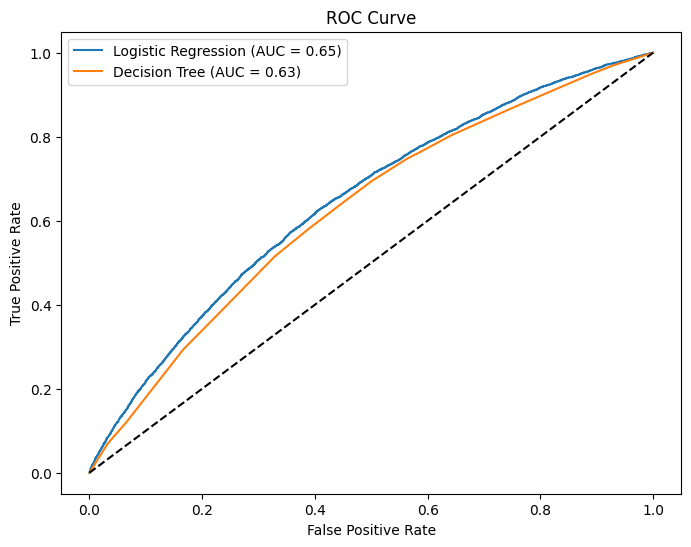

In [9]:
# Plot ROC Curve for both models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
